# MARISCO - Meta Study #

### Fragestellungen ###

- Stresse: Welcher Typ(IUCN-Gruppe) besonders hohe (signifikante) strategic relevance value
- das gleiche für Faktoren
- das gleiche für threats (incl. subgruppe (also nach IUCN group Number, bei der ist die Subgruppe bereits drin))
- Wie verteilen sich die unterschiedlichen Probleme nach Region, Klimazone und HDI

Also hier kommt erst einmal ein wenig *number crunching*, vor allem um einen Teil der Werte in einer gemeinsamen Tabelle zusammen zu stopfen. Lass Dich von dem ganzen Code nicht irritieren.

In [1]:
# Create three data frames frome the files
stresses = read.table('stresses.csv', header = T, sep = '\t')
threats = read.table('threats.csv', header = T, sep = '\t')
factors = read.table('factors.csv', header = T, sep = '\t')

# Merging everything into one data frame.
# Defining a function
make.df = function(){
    if(!file.exists("data.csv")){    
        type = c(
            rep('stress', length(stresses$ID)),
            rep('threat', length(threats$ID)),
            rep('factor', length(factors$ID))
        )
        type = factor(type)
        group = c(as.character(stresses$IUCN_Group),
                  as.character(threats$IUCN_Group),
                  as.character(factors$Group)
                 )
        group = factor(group)
        relevance = c(stresses$Strategic_relevance_.value.,
                      threats$Strategic_Relevance_.Value.,
                      factors$Strategic_Relevance_.Value.
                     )
        region = c(as.character(stresses$Region),
                   as.character(threats$Region),
                   as.character(factors$Region)
                  )
        region = factor(region)
        climate = c(as.character(stresses$Climate),
                   as.character(threats$Climate),
                   as.character(factors$Climate)
                   )
        climate = factor(climate)
        HDI = c(as.character(stresses$Human_Development_Index),
                as.character(threats$Human_Development_Index),
                as.character(factors$Human_Development_Index)
                )
        HDI = factor(HDI)
        df = data.frame(type, group, relevance, region, climate, HDI)
    }
    else{
        df = read.table("data.csv", header = T)
    }
    return(df)    
}
# Use the make.df() function and save the new data frame.
df = make.df()
#write.table(df, file = "data.csv")

# Strategic Relevance of Region, Climate and HDI #

In diesem Teil habe ich zunächst mal die Strategic Relevance nach Region, Klimazone und HDI aufgedröselt. Keine Ahnung, ob das so super sinnvoll ist, ich denke auch nicht, daß man dabei etwas wirklich spektakuläres sieht.

### Region ###

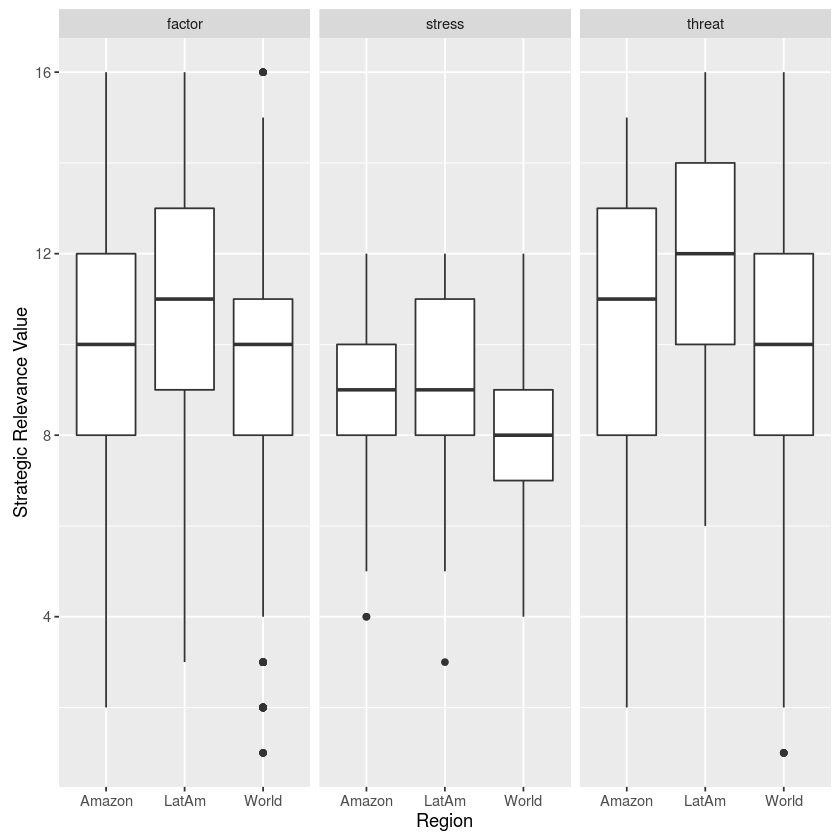

In [2]:
library(ggplot2)
df1 = df[!is.na(df$relevance),]
ggplot(df1, aes(region, relevance)) +
    geom_boxplot() +
    xlab("Region") +
    ylab("Strategic Relevance Value") +
    facet_grid(. ~ type)

### Climate ###

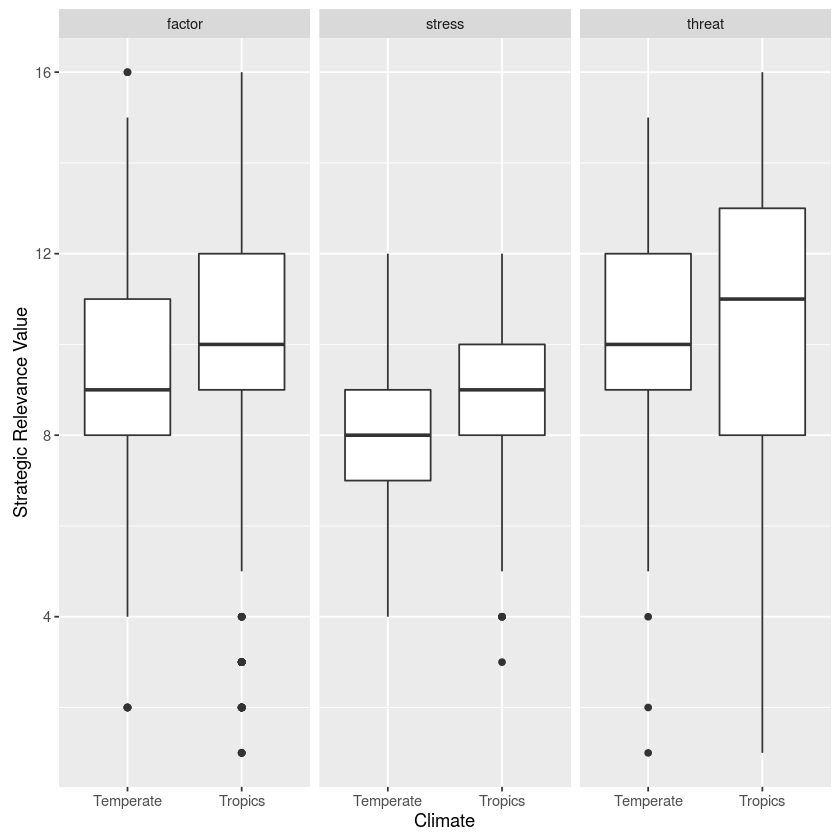

In [3]:
library(ggplot2)
df1 = df[!is.na(df$relevance),]
ggplot(df1, aes(climate, relevance)) +
    geom_boxplot() +
    xlab("Climate") +
    ylab("Strategic Relevance Value") +
    facet_grid(. ~ type)

### Human Development Index ###

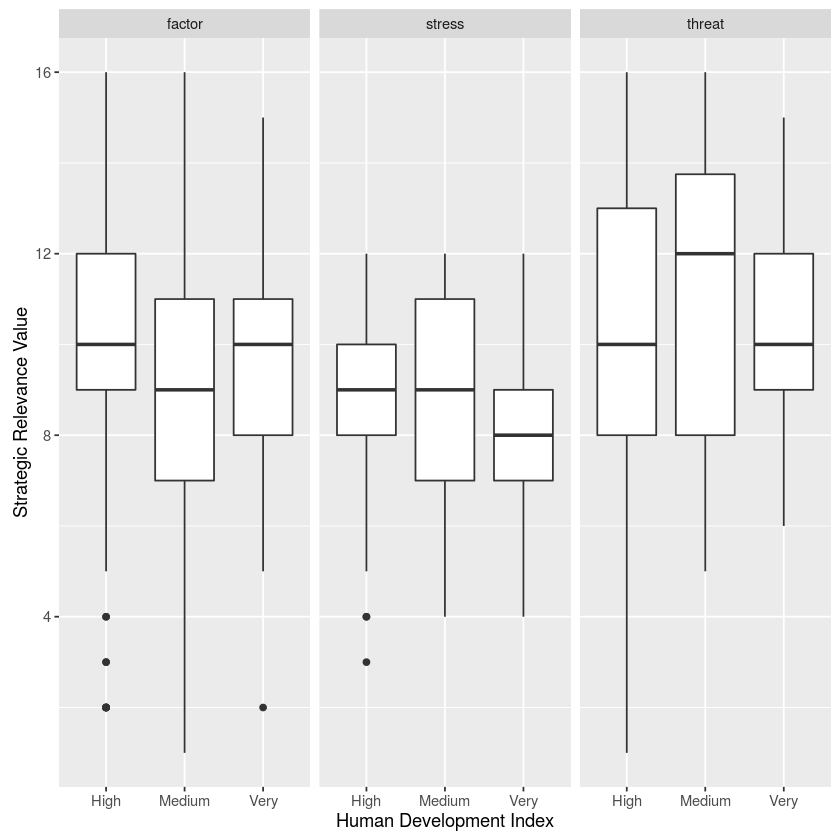

In [4]:
library(ggplot2)
df1 = df[!is.na(df$relevance),]
ggplot(df1, aes(HDI, relevance)) +
    geom_boxplot() +
    xlab("Human Development Index") +
    ylab("Strategic Relevance Value") +
    facet_grid(. ~ type)

# Strategic relevance of stresses, threats and factors #

Hier geht es nun um die tatsächlichen Bewertungen der einzelnen Probleme. Da einige der Boxen sehr verdächtig nach kleiner Gruppengröße aussahen, habe ich diese Information sicherheitshalber mal dahinter schreiben lassen. Zunächst etwas Code, der nicht irritieren soll...

In [5]:
# Define a custom graphic function
my.boxplot = function(x, y){
    # Remove NAs
    x = x[!is.na(y)]
    y = y[!is.na(y)]
    # Create space for long labels
    par(mar = c(5, 15, 2, 2))
    # Calculate the no of categories
    group_n = length(levels(x))
    # Draw boxplot
    boxplot(y ~ x, 
            horizontal = T,
            las = 1,
            range = 0,
            ylim = c(0, 20),
            xlab = "Strategic Relevance"
           )
    # Print sample sizes
    text(
        rep(18, group_n),
        c(1:group_n),
        table(x)
        )
    }

### Stresses ###

Bei den Stressen sieht das alles eher homogen aus. Ich glaube nicht, daß es sich lohnt, da überhaupt mit einem Testverfahren ranzugehen.

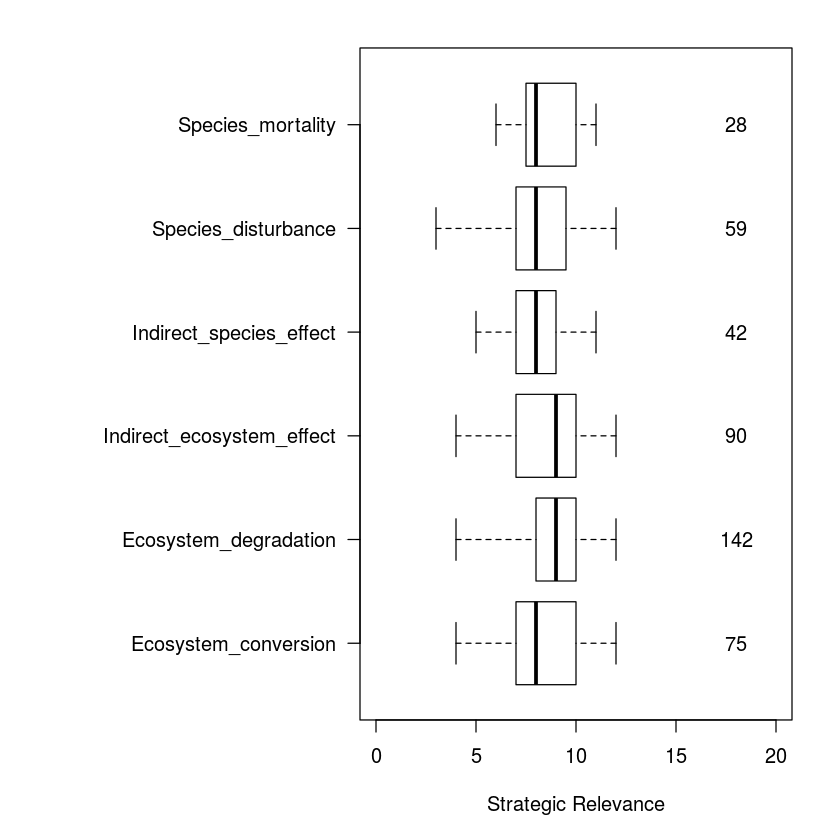

In [6]:
my.boxplot(stresses$IUCN_Group, stresses$Strategic_relevance_.value.)

### Threats ###

Bei den Threats ist auffällig, daß dem Klimawandel scheinbar allgemein die höchste Relevanz zugesprochen wird.

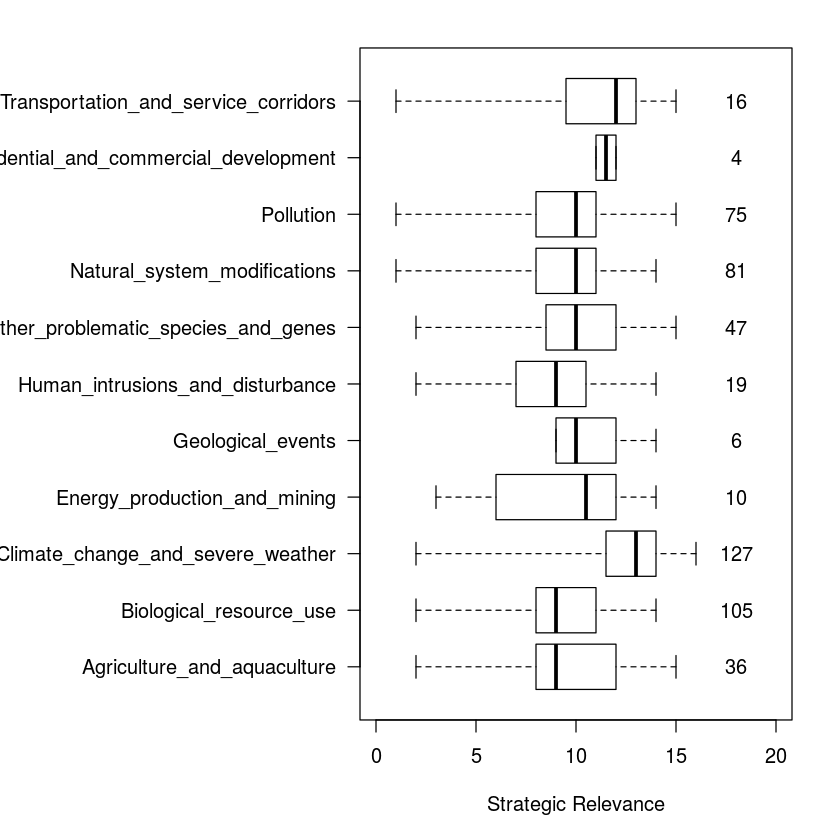

In [7]:
my.boxplot(threats$IUCN_Group, threats$Strategic_Relevance_.Value.)

### Factors ###

Hier ist es schon schwieriger. demographische und natürliche Faktoren scheinen als relevanter bewertet zu werden, als die anderen. Allerdings sind die Stichprobengrößen hier vergleichsweise klein, wobei n = 43 absolut gesehen auch wieder nicht so klein ist...  muss noch drüber nachdenken, ob das ein Problem ist.

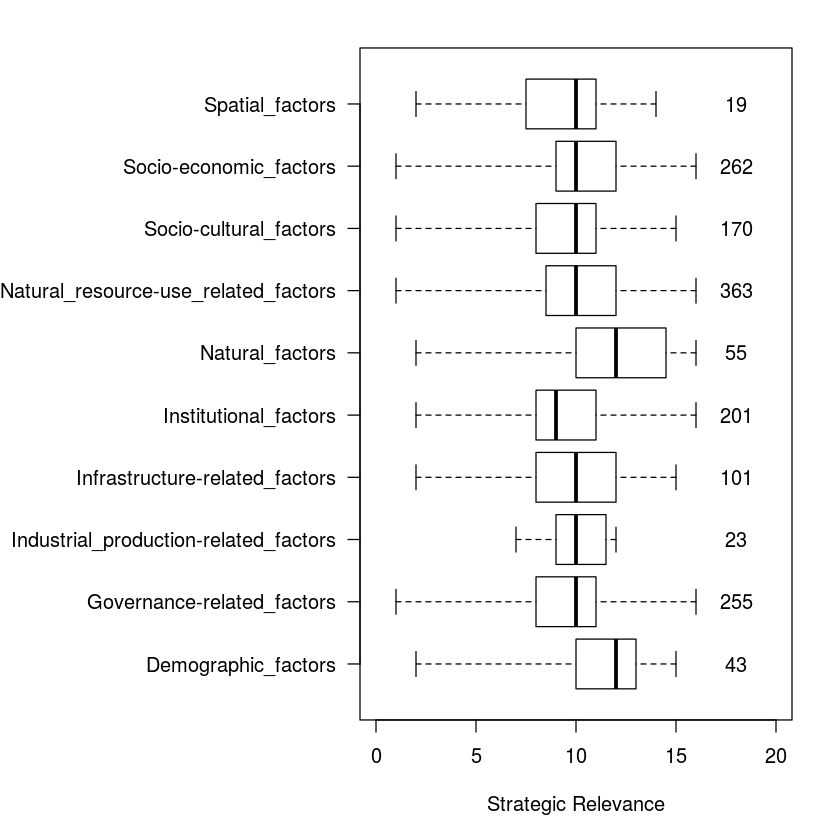

In [8]:
my.boxplot(factors$Group, factors$Strategic_Relevance_.Value.)

# Reletive Frequence of Issues #

Hier geht es nun darum, welche Probleme besonders häufig in einer bestimmten Region, Klimazone oder HDI identifiziert wurden. Die Werte sind z.Zt. noch absolut, d.h. ich muss sie noch auf die relativen Anteile der Regionen, Klimazonen und HDIs in der Studie standartisieren...
Zunächst etwas Script-Fu für das automatische Auszählen:

In [89]:
# Define a function to count occurences factor wise
count.by = function(df, factor){
    problem = paste(df$type, "-", df$group)
    problems = unique(problem)
    factors = unique(factor)
    results = matrix(0, length(problems), 3)
    for(i in 1:3){
        for(j in 1:length(problems)){
        results[j, i] = length(problem[problem == problems[j] & factor == factors[i]])
        }
    }    
    Issue = rep(problems, 3)
    Category = c(rep(as.character(factors[1]), length(problems)),
                 rep(as.character(factors[2]), length(problems)),
                 rep(as.character(factors[3]), length(problems))
                )
    Count = c(results[,1], results[,2], results[,3])
    results = data.frame(Issue, Category, Count)
    return(results)
}

### Region ###

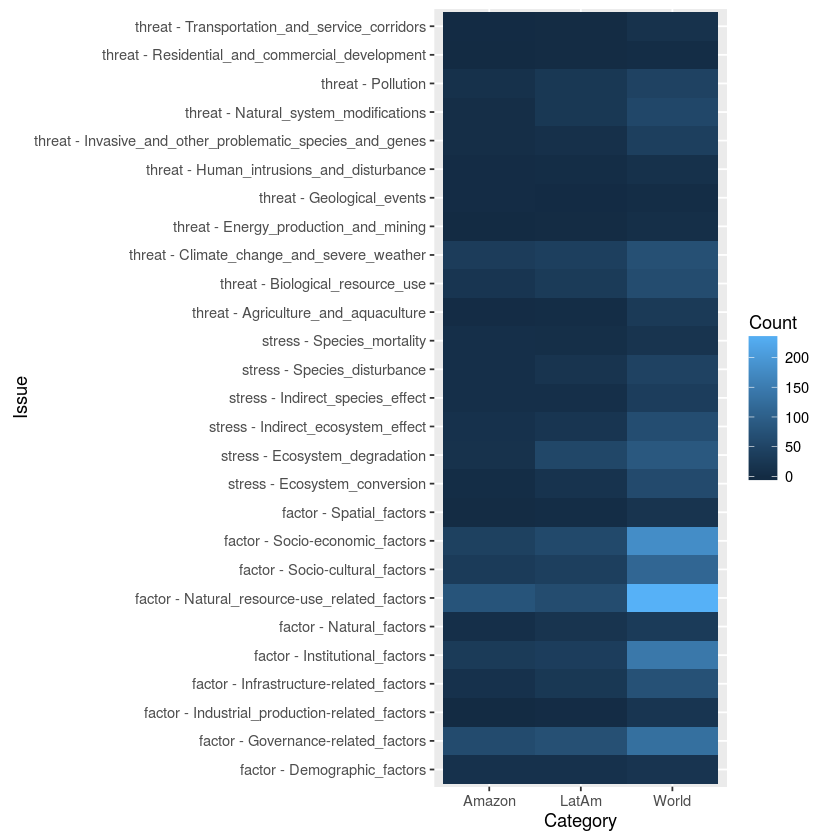

In [90]:
counts = count.by(df, df$region)
ggplot(counts, aes(Category, Issue, fill = Count)) + geom_tile()

### Climate ###

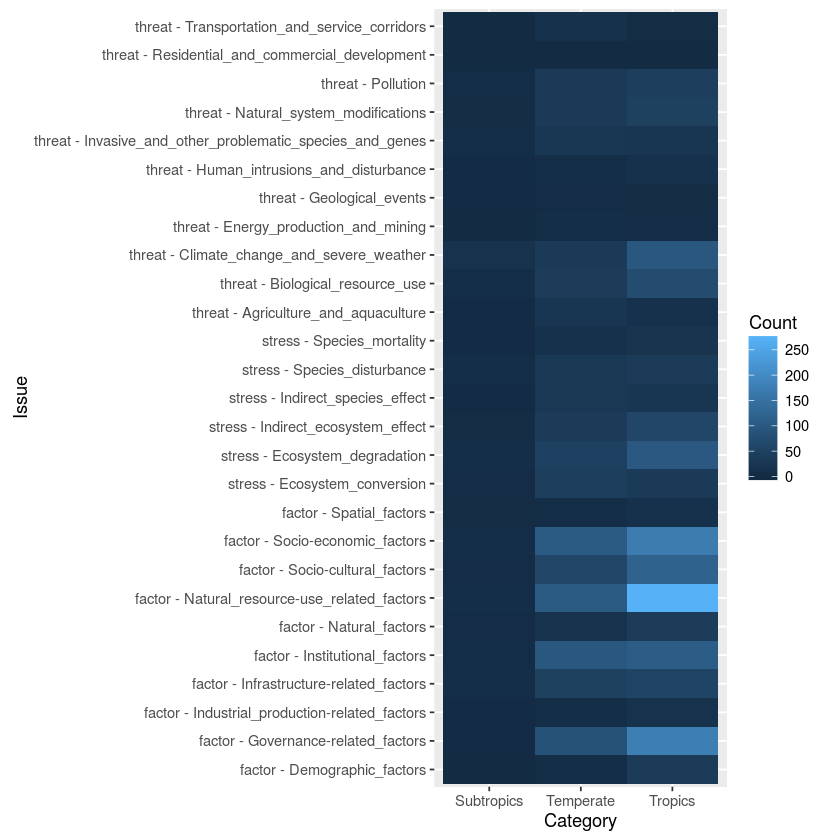

In [87]:
counts = count.by(df, df$climate)
ggplot(counts, aes(Category, Issue, fill = Count)) + geom_tile()

### Human Development Index ###

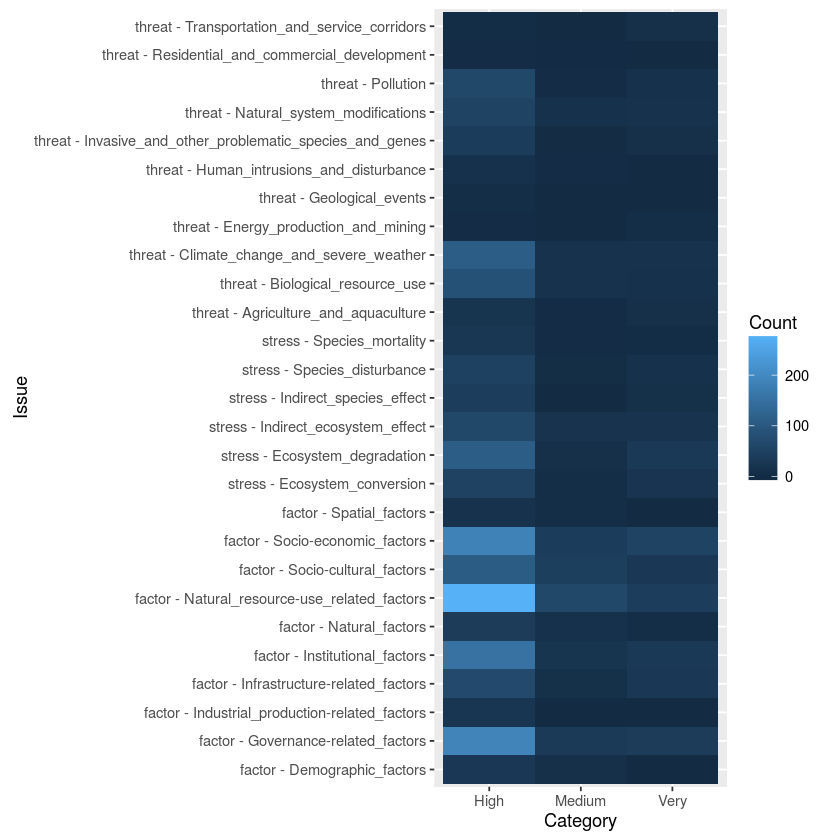

In [88]:
counts = count.by(df, df$HDI)
ggplot(counts, aes(Category, Issue, fill = Count)) + geom_tile()